In [1]:
# Standard libraries
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import csv
import pandas as pd

In [31]:
from scipy.signal import savgol_filter
from scipy.interpolate import interpn

Plot hyperparameters:

In [3]:
fs_labels = 16
fs_ticks  = 12
fs_legend = 12

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],  # "Times", "Palatino", "New Century Schoolbook", "Bookman", 
    })
plt.rcParams['font.size'] = fs_labels
plt.rcParams['axes.titlesize'] = fs_labels
plt.rcParams['axes.labelsize'] = fs_labels
plt.rcParams['xtick.labelsize'] = fs_ticks
plt.rcParams['ytick.labelsize'] = fs_ticks
plt.rcParams['legend.fontsize'] = fs_legend

# Signal

In [34]:
t.shape

(143,)

In [51]:
def smoothen(t, s):
    new_t = np.linspace(np.min(t), np.max(t), 20 * int(len(t)))
    new_s = interpn([t], s, new_t, method="cubic")
    
    return new_t, new_s

In [52]:
# Get values from PyCBC
t = np.loadtxt("../Data/matched_filtering/matched_filtering_signal_sample_times.txt")
s = np.loadtxt("../Data/matched_filtering/matched_filtering_signal_strain.txt")
# Smoothen the values and shift
new_t, new_s = smoothen(t, s)
t_shift = new_t[np.argmax(new_s)]
print(t_shift)

0.022153629711267206


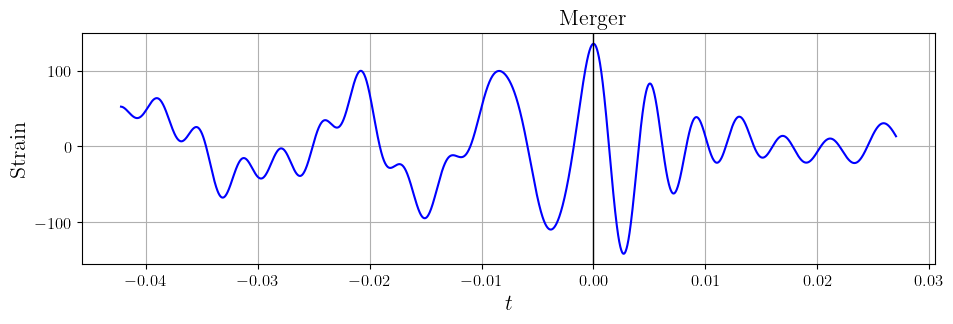

In [53]:
plt.figure(figsize=(11,3))
plt.plot(new_t - t_shift, new_s, color = "blue")
plt.grid()
plt.xlabel(r"$t$")
plt.ylabel(r"Strain")
plt.axvline(0, color="black", linewidth = 1, alpha = 1)
plt.text(-0.0031, 160, "Merger")
plt.savefig("../Plots/Final/matched_filtering_signal.pdf", bbox_inches='tight')
plt.show()

# Templates:

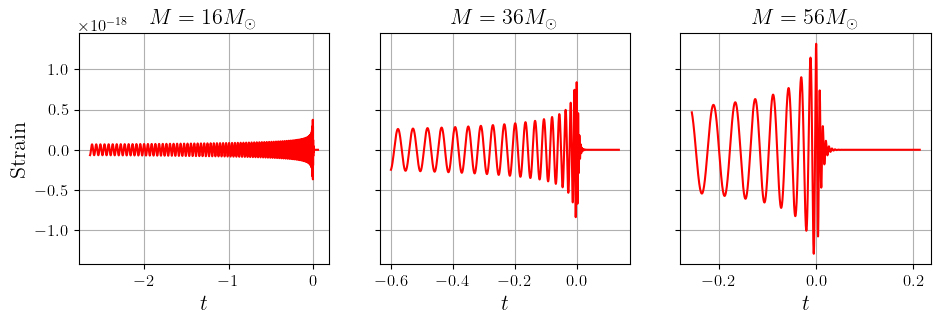

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(11,3), sharey=True)
masses = [16, 36, 56]

for i, ax in enumerate(axs):
    m = masses[i]
    t = np.loadtxt(f"../Data/matched_filtering/matched_filtering_template_sample_times_{int(m)}.txt")
    s = np.loadtxt(f"../Data/matched_filtering/matched_filtering_template_strain_{int(m)}.txt")
    new_t, new_s = smoothen(t, s)
    ax.plot(new_t, new_s, color="red")
    ax.grid()
    ax.set_xlabel(r"$t$")

# Quick and dirty titles
axs[0].set_ylabel("Strain")
axs[0].set_title(r"$M = 16 M_{\odot}$")
axs[1].set_title(r"$M = 36 M_{\odot}$")
axs[2].set_title(r"$M = 56 M_{\odot}$")
plt.savefig("../Plots/Final/matched_filtering_templates.pdf")
plt.show()

# Signal with reconstructions:

In [70]:
# Get values from PyCBC
t_signal = np.loadtxt("../Data/matched_filtering/matched_filtering_signal_sample_times.txt")
s_signal = np.loadtxt("../Data/matched_filtering/matched_filtering_signal_strain.txt")
# Smoothen the values and shift
new_t_signal, new_s_signal = smoothen(t_signal, s_signal)
t_shift_signal = new_t_signal[np.argmax(new_s_signal)]
print(t_shift)

0.022153629711267206


In [75]:
fig, axs = plt.subplots(1, 3, figsize=(11,3), sharey=True)

for i, ax in enumerate(axs):
    # Plot template
    m = masses[i]
    t = np.loadtxt(f"../Data/matched_filtering/matched_filtering_reconstruction_sample_times_{int(m)}.txt")
    s = np.loadtxt(f"../Data/matched_filtering/matched_filtering_reconstruction_strain_{int(m)}.txt")
    new_t, new_s = smoothen(t, s)
    ax.plot(new_t - t_shift, new_s, color="red", label = "Template", alpha = 1)
    # Plot signal
    ax.plot(new_t_signal - t_shift_signal, new_s_signal, color="blue", label = "Signal", alpha = 0.5)
    # Make nice
    ax.grid()
    ax.axvline(0, color="black", linewidth = 1, alpha = 1)
    ax.set_xlabel(r"$t$")
# Quick and dirty titles
axs[0].set_ylabel("Strain")
axs[0].set_title(r"SNR: $9.34$")
axs[1].set_title(r"SNR: $19.68$")
axs[2].set_title(r"SNR: $14.43$")
plt.savefig("../Plots/Final/matched_filtering_reconstructions.pdf")
plt.show()